# Explore Mpl

Use this notebook to explore  candle data from Oanda.  
Reference: [https://towardsdatascience.com/basics-of-ohlc-charts-with-pythons-matplotlib-56d0e745a5be](https://towardsdatascience.com/basics-of-ohlc-charts-with-pythons-matplotlib-56d0e745a5be)  

dotnet run --project .\\BasicOandaApp.ConsoleApp\\ -- --version --dump candles --output ./dump --instrument XAU\_USD --granularity H1

In [1]:
# Imports
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

from datetime import datetime

%matplotlib inline

In [2]:
with open('../dump/XAU_USD-H1-candles.json') as f:
    raw_json_data = f.read()

json_data = json.loads(raw_json_data)

instrument = json_data['instrument']
granularity = json_data['granularity']
candles = json_data['candles']

print(f"{instrument} ({granularity}) candles")
print(f"Sample candle data: {candles[0]}")

XAU_USD (H1) candles
Sample candle data: {'complete': True, 'volume': 23998, 'time': '2022-04-25T18:00:00.000000000Z', 'mid': {'o': '1897.295', 'h': '1902.605', 'l': '1896.519', 'c': '1898.705'}}


In [3]:
# Convert json data to dataframe
flatten_data = [
    [ 
        datetime.strptime(x['time'], "%Y-%m-%dT%H:%M:%S.%f000Z"), 
        bool(x['complete']), 
        int(x['volume']), 
        float(x['mid']['o']), 
        float(x['mid']['h']), 
        float(x['mid']['l']), 
        float(x['mid']['c'])
    ] for x in candles]
df = pd.DataFrame(
    flatten_data, 
    columns=['time','complete', 'Volume', 'Open', 'High', 'Low', 'Close'])

print(f"df shape: {df.shape}")

print(df.info())


df shape: (500, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   time      500 non-null    datetime64[ns]
 1   complete  500 non-null    bool          
 2   Volume    500 non-null    int64         
 3   Open      500 non-null    float64       
 4   High      500 non-null    float64       
 5   Low       500 non-null    float64       
 6   Close     500 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(4), int64(1)
memory usage: 24.1 KB
None


In [4]:
#df['ma'] = df.rolling(5,on='pop').mean()
#print(df.to_string())
df['ma'] = df['Close'].rolling(8).mean()
df['ewm'] = df['Close'].ewm(span=4, adjust=False).mean()
df.head(30)

,time,complete,Volume,Open,High,Low,Close,ma,ewm
0,2022-04-25 18:00:00,True,23998,1897.295,1902.605,1896.519,1898.705,NaN,1898.705000
1,2022-04-25 19:00:00,True,19261,1898.745,1901.874,1897.640,1897.975,NaN,1898.413000
2,2022-04-25 20:00:00,True,8699,1897.975,1899.216,1897.231,1898.045,NaN,1898.265800
3,2022-04-25 22:00:00,True,7170,1898.875,1900.715,1898.603,1899.551,NaN,1898.779880
4,2022-04-25 23:00:00,True,3420,1899.550,1900.445,1898.605,1899.440,NaN,1899.043928
5,2022-04-26 00:00:00,True,14639,1899.500,1903.847,1899.243,1900.965,NaN,1899.812357
6,2022-04-26 01:00:00,True,24123,1900.915,1902.921,1897.405,1900.305,NaN,1900.009414
7,2022-04-26 02:00:00,True,17739,1900.285,1904.089,1899.880,1903.540,1899.815750,1901.421648
8,2022-04-26 03:00:00,True,17655,1903.510,1905.135,1901.573,1902.401,1900.277750,1901.813389
9,2022-04-26 04:00:00,True,12168,1902.390,1905.235,1901.659,1904.005,1901.031500,1902.690033


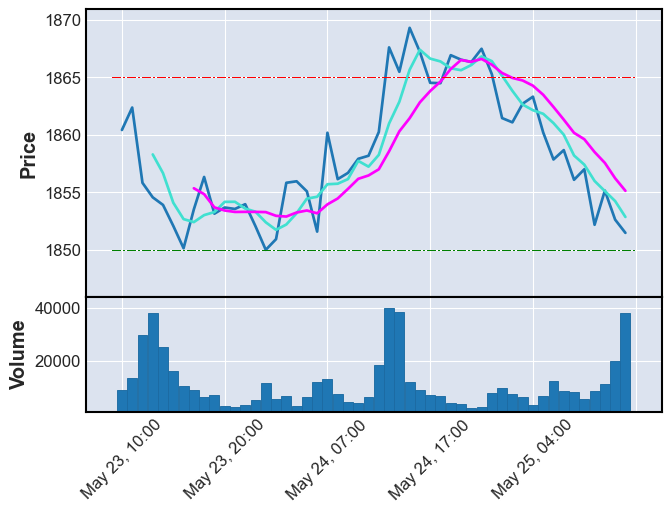

In [18]:
# https://github.com/matplotlib/mplfinance
dfx = df.tail(50).set_index('time')
mpf.plot(dfx, type='line', 
    mav=(4, 8),
    hlines=dict(hlines=[1850,1865],colors=['g','r'],linestyle='-.',linewidths=(1,1)),
    volume=True)


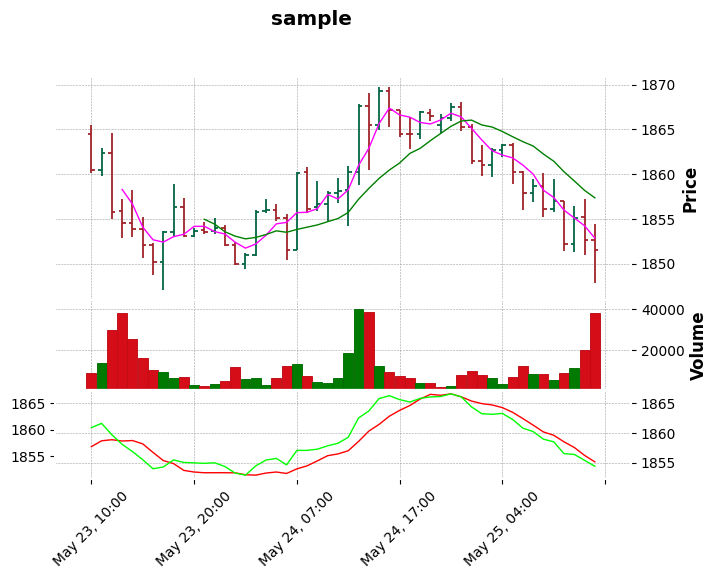

In [107]:
ap0 = [ 
    mpf.make_addplot(dfx['ma'],color='r', width=1, panel=2),  # uses panel 0 by default
    mpf.make_addplot(dfx['ewm'],color='lime', width=1, panel=2),  # uses panel 0 by default
    #mpf.make_addplot(dfx['Volume'],type='line',color='lime', linestyle=' ',panel =1, mav = (4, 12))
    ]

#  mpf.available_styles()


mc = mpf.make_marketcolors(up='g',down='r',
                           edge='lime',
                           wick={'up':'blue','down':'orange'},
                           volume='gray',
                           ohlc='black')
s  = mpf.make_mpf_style(
    base_mpf_style='charles',
    mavcolors=['fuchsia','g','r'],
    #mavcolors=['#1f77b4','#ff7f0e','#2ca02c'],
    #marketcolors=mc
    )

mpf.plot(dfx, type='ohlc',
    mav=(4, 12),
    volume=True, 
    addplot=ap0, 
    style=s, 
    title="sample", 
    linecolor='indigo', update_width_config=dict(line_width=1))

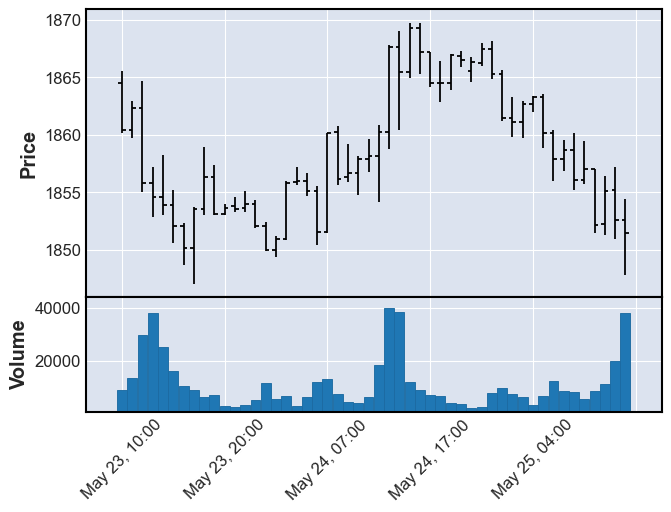

In [8]:
mpf.plot(dfx,volume=True)



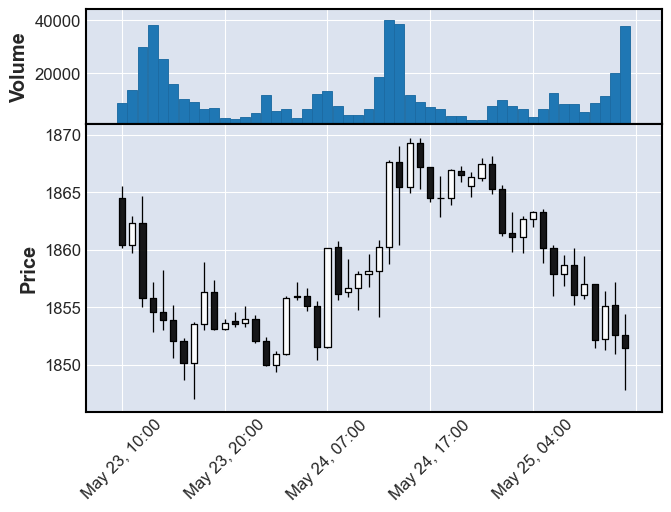

In [9]:
mpf.plot(dfx,type='candle',volume=True,main_panel=1,volume_panel=0)